In [1]:
import numpy as np #import numpy drives sklearn to use numpy arrays instead of python lists
import pandas as pd #CSV and dataframe handling
import matplotlib.pyplot as plt

# Regressors
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

<div class = 'alert alert-info'>
    
**Import the data**

In [2]:
import pandas as pd

# Section 1
MTeams_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MTeams.csv')
# MTeams_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MTeams.csv')

MTSeasons_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MSeasons.csv')
# MTSeasons_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MSeasons.csv')

MNCAATourneySeeds_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MNCAATourneySeeds.csv')
# MNCAATourneySeeds_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MNCAATourneySeeds.csv')

MRegularSeasonCompactResults_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
# MRegularSeasonCompactResults_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MRegularSeasonCompactResults.csv')

MNCAATourneyCompactResults_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
# MNCAATourneyCompact1Results_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MNCAATourneyCompactResults.csv')

In [3]:
# Section 2

# MRegularSeasonDetailedResults_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv')
# MRegularSeasonDetailedResults_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MRegularSeasonDetailedResults.csv')

# MNCAATourneyDetailedResults_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')
# MNCAATourneyDetailedResults_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MNCAATourneyDetailedResults.csv')

In [4]:
# Section 3

# Cities_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/Cities.csv')
# Cities_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/Cities.csv')

# MGameCities_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MGameCities.csv')
# MGameCities_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MGameCities.csv')

In [5]:
# Section 4

# MMasseyOrdinals_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MMasseyOrdinals.csv')
# MMasseyOrdinals_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MMasseyOrdinals.csv')

In [6]:
# Section 5

# MEvents2015 = pd.read_csv('../data/MEvents2015.csv')
# MEvents2016 = pd.read_csv('../data/MEvents2016.csv')
# MEvents2017 = pd.read_csv('../data/MEvents2017.csv')
# MEvents2018 = pd.read_csv('../data/MEvents2018.csv')
# MEvents2019 = pd.read_csv('../data/MEvents2019.csv')
# MPlayers    = pd.read_csv('../data/MPlayers.csv')

In [7]:
# Section 6

# MTeamCoaches_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MTeamCoaches.csv')
# MTeamCoaches_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MTeamCoaches.csv')

# Conferences_Stage1  = pd.read_csv('../data/MDataFiles_Stage1/Conferences.csv')
# Conferences_Stage2  = pd.read_csv('../data/MDataFiles_Stage2/Conferences.csv')

# MTeamConferences_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MTeamConferences.csv')
# MTeamConferences_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MTeamConferences.csv')

# MConferenceTourneyGames_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MConferenceTourneyGames.csv')
# MConferenceTourneyGames_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MConferenceTourneyGames.csv')

# MSecondaryTourneyTeams_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MSecondaryTourneyTeams.csv')
# MSecondaryTourneyTeams_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MSecondaryTourneyTeams.csv')

# MSecondaryTourneyCompactResults_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MSecondaryTourneyCompactResults.csv')
# MSecondaryTourneyCompactResults_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MSecondaryTourneyCompactResults.csv')

# MTeamSpellings_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MTeamSpellings.csv', encoding = "ISO-8859-1", low_memory=False)
# MTeamSpellings_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MTeamSpellings.csv', encoding = "ISO-8859-1", low_memory=False)

# MNCAATourneySlots_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MNCAATourneySlots.csv')
# MNCAATourneySlots_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MNCAATourneySlots.csv')

# MNCAATourneySeedRoundSlots_Stage1 = pd.read_csv('../data/MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv')
# MNCAATourneySeedRoundSlots_Stage2 = pd.read_csv('../data/MDataFiles_Stage2/MNCAATourneySeedRoundSlots.csv')

<div class='alert alert-danger'>
    
**Gridsearch pour le tuning d'hyperparamètres du RandomForestClassifier**<br>
**Features "grossières**

## Prédictions pour chacune des saisons de 2015 à 2019

In [1]:
## Prédictions pour les saisons 2015 - 2019

import pipeline as pp

for s in range(2015,2020):
    # J'ai modifié le pipeline pour pouvoir faire des prédictions saison par saison
    p = pp.pipeline(path='../data/MDataFiles_Stage1/',  season=s)
    
    # Charger le fichier contenant les features
    p.add_team_data('stats_v1.csv') 

    # Ajoute des colonnes contenant la différence de features
    p.compute_differences(['Win rate'])
    p.compute_differences(['Seed'])
    p.compute_differences(['Mean score'])

    p.train_model(s) 
    p.predict(out='test_' + str(s) + '.csv')

[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014]
History merged with stats_v1.csv
Difference computed on Win rate
Difference computed on Seed
Difference computed on Mean score
Generated matches merged with stats_v1.csv
Result saved as test_2015.csv
[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015]
History merged with stats_v1.csv
Difference computed on Win rate
Difference computed on Seed
Difference computed on Mean score
Generated matches merged with stats_v1.csv
Result saved as test_2016.csv
[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016]
History merged with stats_v1.csv
Difference computed on Win rate
Difference computed on Seed
Difference computed on Mean sc

<div class = 'alert alert-info'>

**Calcul de la loss à la main, ne sert pas pour le tuning d'hyperparamètres**

In [25]:
# ## Import the predictions

# test_2015 = pd.read_csv('test_2015.csv')
# test_2016 = pd.read_csv('test_2016.csv')
# test_2017 = pd.read_csv('test_2017.csv')
# test_2018 = pd.read_csv('test_2018.csv')
# test_2019 = pd.read_csv('test_2019.csv')

# # Merge the predictions
# test = pd.concat([test_2015, test_2016, test_2017, test_2018, test_2019])
# test.to_csv('test.csv', index=False)

# # Création d'une colonne Team1_Win : 1 si Team1 a gagné, 0 sinon
# test['Team1_Win'] = 0
# test_2015['Team1_Win']=0

In [26]:
# ## Résultats de tous les MNCAA

# m = MNCAATourneyCompactResults_Stage1
# m1 = pd.DataFrame()
# m1['Season'] = m['Season']
# m1['ID_Team1'] = m['WTeamID']
# m1['ID_Team2'] = m['LTeamID']
# m1['Team1_Win'] = 1

In [16]:
# # Remplissage de la colonne Team1_Win pour chaque saison
# def column_Team1_Win(season, test_file):
    
#     # IDTeam 1 vs IDTeam 2
#     match_pair = list(zip(m1.loc[np.where(m1['Season']==season)[0], 'ID_Team1'], m1.loc[np.where(m1['Season']==season)[0], 'ID_Team2']))

#     index_match = []
#     for i in range(len(match_pair)):

#         index1_2 = np.where((test_file['ID_Team1']==match_pair[i][0]) & (test_file['ID_Team2']==match_pair[i][1]))[0]
#         index2_1 = np.where((test_file['ID_Team2']==match_pair[i][0]) & (test_file['ID_Team1']==match_pair[i][1]))[0]

#         if len(index1_2) != 0:
#             index_match.append(index1_2)
#             test_file.loc[index1_2, 'Team1_Win']=1
#         else:
#             index_match.append(index2_1)
#             test_file.loc[index2_1, 'Team1_Win']=0

#     index_match = np.concatenate(index_match, axis=0)
#     return(index_match)

In [17]:
# ## On ne garde que les combinaisons de match qui ont réellement eu lien pour chaque saison de MNCAA

# index_match_2015 = column_Team1_Win(2015, test_2015)
# index_match_2016 = column_Team1_Win(2016, test_2016)
# index_match_2017 = column_Team1_Win(2017, test_2017)
# index_match_2018 = column_Team1_Win(2018, test_2018)
# index_match_2019 = column_Team1_Win(2019, test_2019)

# test_2015 = test_2015.loc[index_match_2015]
# test_2016 = test_2016.loc[index_match_2016]
# test_2017 = test_2017.loc[index_match_2017]
# test_2018 = test_2018.loc[index_match_2018]
# test_2019 = test_2019.loc[index_match_2019]

In [18]:
# ## Concaténation des prédictions de tous les matchs

# test = pd.concat([test_2015, test_2016, test_2017, test_2018, test_2019])
# test.reset_index(drop=True, inplace=True)

In [19]:
# ## Calcul de la loss à la main

# loss_total = 0
# nb_predictions_tres_fausses = 0

# for i in range(len(test)):
    
#     # Remplacer une probabilité de 0 par 0.001 sinon risque d'avoir une loss de -ind
#     if test.loc[i,'Predic_Team1'] == 0:
#         test.loc[i,'Predic_Team1'] = 0.001
#         nb_predictions_tres_fausses += 1

#     # Remplacer une probabilité de 1 par 0.999 sinon risque d'avoir une loss de -ind
#     elif test.loc[i,'Predic_Team1'] == 1:
#         test.loc[i,'Predic_Team1'] = 0.999
#         nb_predictions_tres_fausses += 1

#     loss = test.loc[i, 'Team1_Win'] * np.log(test.loc[i,'Predic_Team1']) + (1-test.loc[i, 'Team1_Win']) * np.log(1-test.loc[i,'Predic_Team1'])
#     loss_total += loss
    
# loss_total = loss_total / len(test)
# print('Loss totale : {},  prédictions très fausses {}'.format(loss_total, nb_predictions_tres_fausses))

Loss totale : -1.1606391024686913,  prédictions très fausses 0


<div class = 'alert alert-info'>
    
**Gridsearch : Importation de chaque train_set par saison et des résultats des matchs par saison**

In [3]:
## J'ai modifié le pipeline pour qu'il nous renvoie le X_train et le Y_train pour chaque saison

import pandas as pd

X_2015 = pd.read_csv('X_2015.csv')
X_2016 = pd.read_csv('X_2016.csv')
X_2017 = pd.read_csv('X_2017.csv')
X_2018 = pd.read_csv('X_2018.csv')
X_2019 = pd.read_csv('X_2019.csv')

Y_2015 = pd.read_csv('Y_2015.csv')
Y_2016 = pd.read_csv('Y_2016.csv')
Y_2017 = pd.read_csv('Y_2017.csv')
Y_2018 = pd.read_csv('Y_2018.csv')
Y_2019 = pd.read_csv('Y_2019.csv')

<div class = 'alert alert-info'>

**2015 : Gridsearch pour trouver les meilleurs hyperparamètres de RandomForestClassifier**

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.scorer import make_scorer

param_grid = [
 {'n_estimators': [25, 100, 250, 500, 1000], 'max_features': [2, 4, 6, 8, 10], 'max_depth': [2,3,4,5]},
#  {'bootstrap': [False], 'n_estimators': [3, 10, 20], 'max_features': [2, 3, 4, 5, 6]},
 ]

forest_reg = RandomForestClassifier()

# my_scorer = make_scorer(my_custom_loss_func, greater_is_better=False)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_log_loss')

grid_search.fit(X_2015, Y_2015.values.ravel())

/home/willy/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [23]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
import numpy as np

cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params)

0.7742156985620009 {'max_depth': 2, 'max_features': 2, 'n_estimators': 25}
0.7736083754714442 {'max_depth': 2, 'max_features': 2, 'n_estimators': 100}
0.7728514850633088 {'max_depth': 2, 'max_features': 2, 'n_estimators': 250}
0.7737235216052897 {'max_depth': 2, 'max_features': 2, 'n_estimators': 500}
0.7739277952509311 {'max_depth': 2, 'max_features': 2, 'n_estimators': 1000}
0.7610486595809539 {'max_depth': 2, 'max_features': 4, 'n_estimators': 25}
0.7610444455763309 {'max_depth': 2, 'max_features': 4, 'n_estimators': 100}
0.7606530100275098 {'max_depth': 2, 'max_features': 4, 'n_estimators': 250}
0.761297202691147 {'max_depth': 2, 'max_features': 4, 'n_estimators': 500}
0.7611815906378362 {'max_depth': 2, 'max_features': 4, 'n_estimators': 1000}
0.7562187611491761 {'max_depth': 2, 'max_features': 6, 'n_estimators': 25}
0.75607161236226 {'max_depth': 2, 'max_features': 6, 'n_estimators': 100}
0.7555154458033706 {'max_depth': 2, 'max_features': 6, 'n_estimators': 250}
0.75530806384181

<div class = 'alert alert-info'>

**2016 : Gridsearch pour trouver les meilleurs hyperparamètres de RandomForestClassifier**

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.scorer import make_scorer

param_grid = [
 {'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8, 10]},
 {'bootstrap': [False], 'n_estimators': [3, 10, 20], 'max_features': [2, 3, 4, 5, 6]},
 ]

forest_reg = RandomForestClassifier()

# my_scorer = make_scorer(my_custom_loss_func, greater_is_better=False)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_log_loss')

grid_search.fit(X_2016, Y_2016.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [26]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
import numpy as np

cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params)

2.001059683166609 {'max_features': 2, 'n_estimators': 3}
0.9629455591697266 {'max_features': 2, 'n_estimators': 10}
0.7660354469535685 {'max_features': 2, 'n_estimators': 30}
0.7624542556534277 {'max_features': 2, 'n_estimators': 50}
0.7564292052851671 {'max_features': 2, 'n_estimators': 100}
2.0739012222070716 {'max_features': 4, 'n_estimators': 3}
0.995820513020481 {'max_features': 4, 'n_estimators': 10}
0.7907869190428315 {'max_features': 4, 'n_estimators': 30}
0.7683929327787204 {'max_features': 4, 'n_estimators': 50}
0.7585491875675026 {'max_features': 4, 'n_estimators': 100}
2.1106039366680593 {'max_features': 6, 'n_estimators': 3}
1.0164091552345138 {'max_features': 6, 'n_estimators': 10}
0.7709740004805105 {'max_features': 6, 'n_estimators': 30}
0.784125609906585 {'max_features': 6, 'n_estimators': 50}
0.7650518308845039 {'max_features': 6, 'n_estimators': 100}
2.1032476614304447 {'max_features': 8, 'n_estimators': 3}
1.0401669599610979 {'max_features': 8, 'n_estimators': 10}
0

<div class = 'alert alert-info'>

**2017**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.scorer import make_scorer

param_grid = [
 {'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8, 10]},
 {'bootstrap': [False], 'n_estimators': [3, 10, 20], 'max_features': [2, 3, 4, 5, 6]},
 ]

forest_reg = RandomForestClassifier()

# my_scorer = make_scorer(my_custom_loss_func, greater_is_better=False)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_log_loss')

grid_search.fit(X_2017, Y_2017.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [29]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
import numpy as np

cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params)

2.1003768348432548 {'max_features': 2, 'n_estimators': 3}
0.9531341134452932 {'max_features': 2, 'n_estimators': 10}
0.7886477079263247 {'max_features': 2, 'n_estimators': 30}
0.765573616331196 {'max_features': 2, 'n_estimators': 50}
0.7580541128782936 {'max_features': 2, 'n_estimators': 100}
2.080561302107758 {'max_features': 4, 'n_estimators': 3}
1.0515867773582122 {'max_features': 4, 'n_estimators': 10}
0.7884170199774355 {'max_features': 4, 'n_estimators': 30}
0.7698954971283396 {'max_features': 4, 'n_estimators': 50}
0.7591079633687046 {'max_features': 4, 'n_estimators': 100}
2.0695532382975683 {'max_features': 6, 'n_estimators': 3}
1.0459840408983552 {'max_features': 6, 'n_estimators': 10}
0.7885125073013235 {'max_features': 6, 'n_estimators': 30}
0.7756924963739446 {'max_features': 6, 'n_estimators': 50}
0.7630988088832295 {'max_features': 6, 'n_estimators': 100}
2.134431551374377 {'max_features': 8, 'n_estimators': 3}
0.9956159470216543 {'max_features': 8, 'n_estimators': 10}
0

<div class = 'alert alert-info'>

**2018**

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.scorer import make_scorer

param_grid = [
 {'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8, 10]},
 {'bootstrap': [False], 'n_estimators': [3, 10, 20], 'max_features': [2, 3, 4, 5, 6]},
 ]

forest_reg = RandomForestClassifier()

# my_scorer = make_scorer(my_custom_loss_func, greater_is_better=False)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_log_loss')

grid_search.fit(X_2018, Y_2018.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [32]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
import numpy as np

cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params)

2.011263430641238 {'max_features': 2, 'n_estimators': 3}
0.9500165861124445 {'max_features': 2, 'n_estimators': 10}
0.7640672960074696 {'max_features': 2, 'n_estimators': 30}
0.7559488453342286 {'max_features': 2, 'n_estimators': 50}
0.7547552245664816 {'max_features': 2, 'n_estimators': 100}
2.1336734726864925 {'max_features': 4, 'n_estimators': 3}
0.9929869042792716 {'max_features': 4, 'n_estimators': 10}
0.7895722639368876 {'max_features': 4, 'n_estimators': 30}
0.7694969097044299 {'max_features': 4, 'n_estimators': 50}
0.7608577381720241 {'max_features': 4, 'n_estimators': 100}
2.0556492471408374 {'max_features': 6, 'n_estimators': 3}
1.0385538981995892 {'max_features': 6, 'n_estimators': 10}
0.7913131228562164 {'max_features': 6, 'n_estimators': 30}
0.770953792805873 {'max_features': 6, 'n_estimators': 50}
0.7596685478530131 {'max_features': 6, 'n_estimators': 100}
2.0660414969677503 {'max_features': 8, 'n_estimators': 3}
1.0086534799485567 {'max_features': 8, 'n_estimators': 10}


<div class = 'alert alert-info'>

**2019**

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.scorer import make_scorer

param_grid = [
 {'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8, 10]},
 {'bootstrap': [False], 'n_estimators': [3, 10, 20], 'max_features': [2, 3, 4, 5, 6]},
 ]

forest_reg = RandomForestClassifier()

# my_scorer = make_scorer(my_custom_loss_func, greater_is_better=False)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_log_loss')

grid_search.fit(X_2019, Y_2019.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [35]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
import numpy as np

cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params)

2.0313872377667876 {'max_features': 2, 'n_estimators': 3}
0.9797045681873444 {'max_features': 2, 'n_estimators': 10}
0.7719336788124189 {'max_features': 2, 'n_estimators': 30}
0.7576206531601448 {'max_features': 2, 'n_estimators': 50}
0.7536232418764417 {'max_features': 2, 'n_estimators': 100}
2.074029846792978 {'max_features': 4, 'n_estimators': 3}
0.9670893660751682 {'max_features': 4, 'n_estimators': 10}
0.7732369669603848 {'max_features': 4, 'n_estimators': 30}
0.7620311252424975 {'max_features': 4, 'n_estimators': 50}
0.7559717411890798 {'max_features': 4, 'n_estimators': 100}
2.158044845577156 {'max_features': 6, 'n_estimators': 3}
0.979864750133927 {'max_features': 6, 'n_estimators': 10}
0.797113898036547 {'max_features': 6, 'n_estimators': 30}
0.762178816660016 {'max_features': 6, 'n_estimators': 50}
0.7567332012077266 {'max_features': 6, 'n_estimators': 100}
2.1097691801364316 {'max_features': 8, 'n_estimators': 3}
0.9902524327291414 {'max_features': 8, 'n_estimators': 10}
0.7

<div class = 'alert alert-danger'>
    
## LogisticRegression : Importance des features dans les prédictions

In [30]:
## J'ai modifié le pipeline pour qu'il nous renvoie le X_train et le Y_train pour chaque saison

import pandas as pd

X_2015 = pd.read_csv('X_2015.csv')
X_2016 = pd.read_csv('X_2016.csv')
X_2017 = pd.read_csv('X_2017.csv')
X_2018 = pd.read_csv('X_2018.csv')
X_2019 = pd.read_csv('X_2019.csv')

Y_2015 = pd.read_csv('Y_2015.csv')
Y_2016 = pd.read_csv('Y_2016.csv')
Y_2017 = pd.read_csv('Y_2017.csv')
Y_2018 = pd.read_csv('Y_2018.csv')
Y_2019 = pd.read_csv('Y_2019.csv')

# Drop certaines colonnes qui n'ont pas d'importance
X_2015.drop(columns=['ID_Team1', 'ID_Team2', 'TeamID_Team1', 'TeamID_Team2', 'Season'], inplace=True)

In [31]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_2015, Y_2015)
acc_log = round(logreg.score(X_2015, Y_2015) * 100, 2)
acc_log

/home/willy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


71.5

In [32]:
# Corrélation des features et importance dans les prédictions

coeff_df = pd.DataFrame(X_2015.columns.delete(0))
coeff_df["Correlation"] = pd.Series(logreg.coef_[0]*100)
coeff_df.sort_values(by='Correlation', ascending=False)

,0,Correlation
12,Mean score_Team2,4.828900
2,W_Team1,3.667324
3,L_Team1,3.211455
7,Played_Team2,0.741469
4,Win rate_Team1,0.455869
14,Seed_diff,0.028951
5,Seed_Team1,0.014478
0,Team2_Home,0.000000
1,Played_Team1,0.000000
11,Seed_Team2,-0.014472


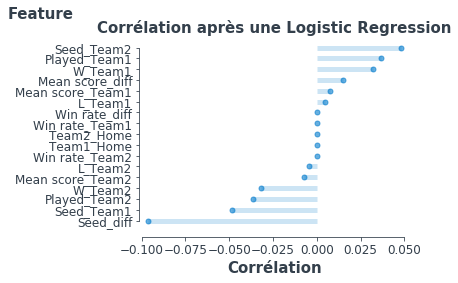

In [33]:
## Histogramme

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

columns = X_2015.columns

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# create some fake data
correlation = pd.Series(logreg.coef_[0], 
                        index=columns)
df = pd.DataFrame({'Corrélation' : correlation})
df = df.sort_values(by='Corrélation')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['Corrélation'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['Corrélation'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Corrélation', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Feature', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))
s
plt.title('Corrélation après une Logistic Regression', fontsize=15, fontweight='black')

plt.savefig('hist2.png', dpi=300, bbox_inches='tight')
